# 深度学习方法

In [212]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

In [213]:
os.listdir('.')

['deep.ipynb',
 'result',
 '.DS_Store',
 'dataset',
 'notebook.ipynb',
 'predict.py',
 '.gitignore',
 '.git',
 '.idea']

In [214]:
baseinfo = pd.read_csv('dataset/1baseinfo.csv')

train_labels = pd.read_csv('dataset/train.csv')

test_data = pd.read_csv('dataset/evaluation_public.csv')

invest_data = pd.read_csv('dataset/4investinfo.csv')

invest_data['Sharehold'] = invest_data['Sharehold'].fillna(0).astype('float32')


In [216]:

invest_data = invest_data[['EID']].groupby(['EID']).size().reset_index(name='counts')
invest_data['counts'] = invest_data['counts'].fillna(0).astype('int')

invest_data.head()

,EID,counts
0,99514,1
1,103798,1
2,125132,1
3,125135,1
4,127718,1


In [217]:

baseinfo['EID'] = baseinfo['EID'].fillna(0)
baseinfo['CreateYear'] = baseinfo['CreateYear'].fillna(0)
baseinfo['TradeType'] = baseinfo['TradeType'].fillna(0).astype('int')
baseinfo['RegisteredCapital'] = baseinfo['RegisteredCapital'].fillna(0).astype('int')
baseinfo['Feature1'] = baseinfo['Feature1'].fillna(0)
baseinfo['Feature2'] = baseinfo['Feature2'].fillna(0)
baseinfo['Feature3'] = baseinfo['Feature3'].fillna(0)
baseinfo['Feature4'] = baseinfo['Feature4'].fillna(0)
baseinfo['Feature5'] = baseinfo['Feature5'].fillna(0)
train_labels['EndDate'] = train_labels['EndDate'].fillna('197012').astype('int')

merged_train = pd.merge(baseinfo,invest_data,on='EID',how='left')
merged_train = pd.merge(merged_train, train_labels, on='EID', how='right')
merged_train['counts'] = merged_train['counts'].fillna(0).astype('int')



print(len(merged_train))

merged_train.head()


150095


,EID,CreateYear,TradeType,RegisteredCapital,Type,Feature1,Feature2,Feature3,Feature4,Feature5,counts,Y,EndDate
0,732046267,1980,51,480,13,25.0,1.0,98041.0,17.0,0.0,1,0,197012
1,1338267101,2005,74,240,5,0.0,2.0,1500.0,0.0,0.0,0,0,197012
2,1057042610,2011,75,3000,6,4.0,8.0,10500.0,13.0,0.0,1,0,197012
3,400121247,1982,55,1000,6,9.0,2.0,619318.0,31.0,0.0,1,0,197012
4,970179772,1986,53,150,17,4.0,1.0,13000.0,31.0,0.0,1,1,201612


In [197]:
train_x = merged_train.iloc[:,1:11]

train_y = merged_train.iloc[:,11:12]
train_y.head()

,Y
0,0
1,0
2,0
3,0
4,1


In [198]:
merged_test = pd.merge(baseinfo, invest_data, on='EID', how='left')
merged_test = pd.merge(merged_test, test_data, on='EID', how='right')
merged_test['counts'] = merged_test['counts'].fillna(0).astype('int')

test_x = merged_test.iloc[:,1:11]


test_x.head()



,CreateYear,TradeType,RegisteredCapital,Type,Feature1,Feature2,Feature3,Feature4,Feature5,counts
0,1993,74,30,13,0.0,1.0,570.0,3.0,0.0,0
1,2015,69,1000,6,2.0,1.0,1000.0,0.0,0.0,0
2,1995,54,14200,5,0.0,2.0,11280.0,5.0,0.0,3
3,2002,48,2800,7,0.0,22.0,100.0,0.0,0.0,1
4,2015,51,7000,6,3.0,2.0,909980.0,12.0,0.0,0


In [199]:
## split data to train and test
count = len(merged_train)


all_x = merged_train.iloc[:, 1:11]
all_x = all_x.values

all_y = merged_train.iloc[:, 11:12]
all_y = all_y.values


In [200]:
print(type(all_y),type(all_x))

all_x = sequence.pad_sequences(all_x)
all_y = sequence.pad_sequences(all_y)

print(all_x.shape)
print(all_y.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(150095, 10)
(150095, 1)


In [211]:
model = Sequential()

model.add(Dense(10, input_dim=10))
model.add(Activation('sigmoid'))
model.add(Dense(5, input_dim=10))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=10))
model.add(Activation('sigmoid'))
model.add(Dense(1, activation='softmax'))

# 二分类问题
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(all_x, all_y,
          validation_split=0.1,
          batch_size=128,
          epochs=5,
          )

model.evaluate(all_x, all_y)

## 计算AUC
import sklearn

res = model.predict(train_x)

auc = sklearn.metrics.roc_auc_score(train_y, res)

print(auc)

f1 = sklearn.metrics.f1_score(train_y, res)
print(0.7 * auc + 0.3 * f1)


Train on 135085 samples, validate on 15010 samples
Epoch 1/5


   128/135085 [..............................] - ETA: 41:32 - loss: 14.0741 - acc: 0.1172

  2688/135085 [..............................] - ETA: 1:58 - loss: 13.9081 - acc: 0.1276 

  5376/135085 [>.............................] - ETA: 59s - loss: 13.8843 - acc: 0.1291 

  8064/135085 [>.............................] - ETA: 39s - loss: 13.8211 - acc: 0.1331

 11008/135085 [=>............................] - ETA: 28s - loss: 13.8236 - acc: 0.1329

 13568/135085 [==>...........................] - ETA: 23s - loss: 13.8168 - acc: 0.1333

 16128/135085 [==>...........................] - ETA: 19s - loss: 13.8497 - acc: 0.1313

 18944/135085 [===>..........................] - ETA: 16s - loss: 13.8292 - acc: 0.1325

 21632/135085 [===>..........................] - ETA: 14s - loss: 13.8081 - acc: 0.1339

 24704/135085 [====>.........................] - ETA: 12s - loss: 13.7850 - acc: 0.1353

 27136/135085 [=====>........................] - ETA: 11s - loss: 13.7792 - acc: 0.1357

 29824/135085 [=====>........................] - ETA: 10s - loss: 13.7796 - acc: 0.1357

 32768/135085 [======>.......................] - ETA: 9s - loss: 13.7822 - acc: 0.1355 

 35456/135085 [======>.......................] - ETA: 8s - loss: 13.7882 - acc: 0.1351

 38272/135085 [=======>......................] - ETA: 7s - loss: 13.7963 - acc: 0.1346

 41472/135085 [========>.....................] - ETA: 7s - loss: 13.7924 - acc: 0.1349

 44416/135085 [========>.....................] - ETA: 6s - loss: 13.7934 - acc: 0.1348

 46976/135085 [=========>....................] - ETA: 6s - loss: 13.7925 - acc: 0.1349

 49792/135085 [==========>...................] - ETA: 5s - loss: 13.7956 - acc: 0.1347

 52608/135085 [==========>...................] - ETA: 5s - loss: 13.7944 - acc: 0.1347

 55424/135085 [===========>..................] - ETA: 4s - loss: 13.7957 - acc: 0.1347



 58496/135085 [===========>..................] - ETA: 4s - loss: 13.7994 - acc: 0.1344

 60672/135085 [============>.................] - ETA: 4s - loss: 13.7967 - acc: 0.1346

 63616/135085 [=============>................] - ETA: 3s - loss: 13.7895 - acc: 0.1350

 66560/135085 [=============>................] - ETA: 3s - loss: 13.7865 - acc: 0.1352

 69120/135085 [==============>...............] - ETA: 3s - loss: 13.7911 - acc: 0.1349

 71808/135085 [==============>...............] - ETA: 3s - loss: 13.7902 - acc: 0.1350

 74624/135085 [===============>..............] - ETA: 3s - loss: 13.7949 - acc: 0.1347

 77824/135085 [================>.............] - ETA: 2s - loss: 13.7966 - acc: 0.1346

 80896/135085 [================>.............] - ETA: 2s - loss: 13.7917 - acc: 0.1349

 84096/135085 [=================>............] - ETA: 2s - loss: 13.7884 - acc: 0.1351

 87040/135085 [==================>...........] - ETA: 2s - loss: 13.7853 - acc: 0.1353

 90112/135085 [===================>..........] - ETA: 1s - loss: 13.7861 - acc: 0.1353

 92928/135085 [===================>..........] - ETA: 1s - loss: 13.7900 - acc: 0.1350

 95616/135085 [====================>.........] - ETA: 1s - loss: 13.7839 - acc: 0.1354

 97664/135085 [====================>.........] - ETA: 1s - loss: 13.7837 - acc: 0.1354



 99840/135085 [=====================>........] - ETA: 1s - loss: 13.7837 - acc: 0.1354

102528/135085 [=====================>........] - ETA: 1s - loss: 13.7826 - acc: 0.1355

105344/135085 [======================>.......] - ETA: 1s - loss: 13.7825 - acc: 0.1355

108160/135085 [=======================>......] - ETA: 1s - loss: 13.7798 - acc: 0.1357

111232/135085 [=======================>......] - ETA: 0s - loss: 13.7863 - acc: 0.1352

114176/135085 [========================>.....] - ETA: 0s - loss: 13.7861 - acc: 0.1353

116736/135085 [========================>.....] - ETA: 0s - loss: 13.7864 - acc: 0.1352

118784/135085 [=========================>....] - ETA: 0s - loss: 13.7854 - acc: 0.1353

121472/135085 [=========================>....] - ETA: 0s - loss: 13.7862 - acc: 0.1352

124416/135085 [==========================>...] - ETA: 0s - loss: 13.7874 - acc: 0.1352

127360/135085 [===========================>..] - ETA: 0s - loss: 13.7867 - acc: 0.1352

130432/135085 [===========================>..] - ETA: 0s - loss: 13.7920 - acc: 0.1349

132480/135085 [============================>.] - ETA: 0s - loss: 13.7906 - acc: 0.1350

135085/135085 [==============================] - 5s 39us/step - loss: 13.7918 - acc: 0.1349 - val_loss: 13.6737 - val_acc: 0.1423


Epoch 2/5
   128/135085 [..............................] - ETA: 6s - loss: 13.0777 - acc: 0.1797

  2432/135085 [..............................] - ETA: 3s - loss: 13.6939 - acc: 0.1410

  5248/135085 [>.............................] - ETA: 2s - loss: 13.7855 - acc: 0.1353

  7936/135085 [>.............................] - ETA: 2s - loss: 13.8009 - acc: 0.1343

  9984/135085 [=>............................] - ETA: 2s - loss: 13.7580 - acc: 0.1370



 11264/135085 [=>............................] - ETA: 2s - loss: 13.7911 - acc: 0.1349

 12928/135085 [=>............................] - ETA: 2s - loss: 13.8139 - acc: 0.1335

 15232/135085 [==>...........................] - ETA: 2s - loss: 13.7905 - acc: 0.1350

 17408/135085 [==>...........................] - ETA: 2s - loss: 13.7847 - acc: 0.1353

 19456/135085 [===>..........................] - ETA: 2s - loss: 13.7816 - acc: 0.1355

 21120/135085 [===>..........................] - ETA: 2s - loss: 13.7911 - acc: 0.1349

 23040/135085 [====>.........................] - ETA: 2s - loss: 13.7897 - acc: 0.1350

 24960/135085 [====>.........................] - ETA: 2s - loss: 13.7957 - acc: 0.1347

 27648/135085 [=====>........................] - ETA: 2s - loss: 13.8095 - acc: 0.1338

 30464/135085 [=====>........................] - ETA: 2s - loss: 13.8020 - acc: 0.1343

 32512/135085 [======>.......................] - ETA: 2s - loss: 13.8020 - acc: 0.1343

 34432/135085 [======>.......................] - ETA: 2s - loss: 13.7986 - acc: 0.1345

 36352/135085 [=======>......................] - ETA: 2s - loss: 13.8053 - acc: 0.1341

 38272/135085 [=======>......................] - ETA: 2s - loss: 13.8055 - acc: 0.1340

 40960/135085 [========>.....................] - ETA: 2s - loss: 13.8005 - acc: 0.1344

 43904/135085 [========>.....................] - ETA: 2s - loss: 13.8058 - acc: 0.1340

 46848/135085 [=========>....................] - ETA: 2s - loss: 13.8019 - acc: 0.1343

 49664/135085 [==========>...................] - ETA: 1s - loss: 13.8038 - acc: 0.1341

 52480/135085 [==========>...................] - ETA: 1s - loss: 13.8035 - acc: 0.1342

 55296/135085 [===========>..................] - ETA: 1s - loss: 13.8028 - acc: 0.1342

 57344/135085 [===========>..................] - ETA: 1s - loss: 13.8047 - acc: 0.1341

 60160/135085 [============>.................] - ETA: 1s - loss: 13.8044 - acc: 0.1341

 63104/135085 [=============>................] - ETA: 1s - loss: 13.8063 - acc: 0.1340

 65792/135085 [=============>................] - ETA: 1s - loss: 13.8141 - acc: 0.1335

 68224/135085 [==============>...............] - ETA: 1s - loss: 13.8152 - acc: 0.1334

 70912/135085 [==============>...............] - ETA: 1s - loss: 13.8124 - acc: 0.1336

 73984/135085 [===============>..............] - ETA: 1s - loss: 13.8160 - acc: 0.1334

 77056/135085 [================>.............] - ETA: 1s - loss: 13.8128 - acc: 0.1336

 79872/135085 [================>.............] - ETA: 1s - loss: 13.8145 - acc: 0.1335

 82432/135085 [=================>............] - ETA: 1s - loss: 13.8132 - acc: 0.1336

 84608/135085 [=================>............] - ETA: 1s - loss: 13.8077 - acc: 0.1339

 87424/135085 [==================>...........] - ETA: 1s - loss: 13.8042 - acc: 0.1341

 90240/135085 [===================>..........] - ETA: 0s - loss: 13.8070 - acc: 0.1339



 93184/135085 [===================>..........] - ETA: 0s - loss: 13.8025 - acc: 0.1342

 96000/135085 [====================>.........] - ETA: 0s - loss: 13.8034 - acc: 0.1342

 99200/135085 [=====================>........] - ETA: 0s - loss: 13.8013 - acc: 0.1343

102272/135085 [=====================>........] - ETA: 0s - loss: 13.8017 - acc: 0.1343

105472/135085 [======================>.......] - ETA: 0s - loss: 13.8037 - acc: 0.1341

108672/135085 [=======================>......] - ETA: 0s - loss: 13.8030 - acc: 0.1342

111744/135085 [=======================>......] - ETA: 0s - loss: 13.8019 - acc: 0.1343

114944/135085 [========================>.....] - ETA: 0s - loss: 13.8001 - acc: 0.1344

118144/135085 [=========================>....] - ETA: 0s - loss: 13.7966 - acc: 0.1346

121344/135085 [=========================>....] - ETA: 0s - loss: 13.7935 - acc: 0.1348

124544/135085 [==========================>...] - ETA: 0s - loss: 13.7952 - acc: 0.1347

127744/135085 [===========================>..] - ETA: 0s - loss: 13.7950 - acc: 0.1347

130816/135085 [============================>.] - ETA: 0s - loss: 13.7918 - acc: 0.1349

134016/135085 [============================>.] - ETA: 0s - loss: 13.7916 - acc: 0.1349

135085/135085 [==============================] - 3s 20us/step - loss: 13.7918 - acc: 0.1349 - val_loss: 13.6737 - val_acc: 0.1423


Epoch 3/5
   128/135085 [..............................] - ETA: 7s - loss: 13.3268 - acc: 0.1641

  2688/135085 [..............................] - ETA: 2s - loss: 13.8072 - acc: 0.1339

  5632/135085 [>.............................] - ETA: 2s - loss: 13.8279 - acc: 0.1326

  7936/135085 [>.............................] - ETA: 2s - loss: 13.8170 - acc: 0.1333

 10624/135085 [=>............................] - ETA: 2s - loss: 13.8370 - acc: 0.1321

 13440/135085 [=>............................] - ETA: 2s - loss: 13.8084 - acc: 0.1339

 16640/135085 [==>...........................] - ETA: 2s - loss: 13.8183 - acc: 0.1332

 19840/135085 [===>..........................] - ETA: 2s - loss: 13.8098 - acc: 0.1338

 23040/135085 [====>.........................] - ETA: 2s - loss: 13.8230 - acc: 0.1329

 26112/135085 [====>.........................] - ETA: 1s - loss: 13.8012 - acc: 0.1343

 29312/135085 [=====>........................] - ETA: 1s - loss: 13.7908 - acc: 0.1350

 32128/135085 [======>.......................] - ETA: 1s - loss: 13.8077 - acc: 0.1339

 34944/135085 [======>.......................] - ETA: 1s - loss: 13.8059 - acc: 0.1340

 38144/135085 [=======>......................] - ETA: 1s - loss: 13.8096 - acc: 0.1338

 41216/135085 [========>.....................] - ETA: 1s - loss: 13.7976 - acc: 0.1345

 44416/135085 [========>.....................] - ETA: 1s - loss: 13.7960 - acc: 0.1346

 47616/135085 [=========>....................] - ETA: 1s - loss: 13.7922 - acc: 0.1349

 50816/135085 [==========>...................] - ETA: 1s - loss: 13.7858 - acc: 0.1353

 53760/135085 [==========>...................] - ETA: 1s - loss: 13.7820 - acc: 0.1355

 56832/135085 [===========>..................] - ETA: 1s - loss: 13.7807 - acc: 0.1356

 59904/135085 [============>.................] - ETA: 1s - loss: 13.7864 - acc: 0.1352

 63104/135085 [=============>................] - ETA: 1s - loss: 13.7839 - acc: 0.1354

 66176/135085 [=============>................] - ETA: 1s - loss: 13.7838 - acc: 0.1354

 69504/135085 [==============>...............] - ETA: 1s - loss: 13.7863 - acc: 0.1352

 72576/135085 [===============>..............] - ETA: 1s - loss: 13.7952 - acc: 0.1347

 75648/135085 [===============>..............] - ETA: 1s - loss: 13.7882 - acc: 0.1351

 78720/135085 [================>.............] - ETA: 0s - loss: 13.7906 - acc: 0.1350

 81792/135085 [=================>............] - ETA: 0s - loss: 13.7884 - acc: 0.1351

 84992/135085 [=================>............] - ETA: 0s - loss: 13.7935 - acc: 0.1348

 88192/135085 [==================>...........] - ETA: 0s - loss: 13.7911 - acc: 0.1349

 91392/135085 [===================>..........] - ETA: 0s - loss: 13.7895 - acc: 0.1350

 94592/135085 [====================>.........] - ETA: 0s - loss: 13.7890 - acc: 0.1351

 97792/135085 [====================>.........] - ETA: 0s - loss: 13.7911 - acc: 0.1349

100992/135085 [=====================>........] - ETA: 0s - loss: 13.7886 - acc: 0.1351

104192/135085 [======================>.......] - ETA: 0s - loss: 13.7905 - acc: 0.1350

107392/135085 [======================>.......] - ETA: 0s - loss: 13.7939 - acc: 0.1348

110592/135085 [=======================>......] - ETA: 0s - loss: 13.7982 - acc: 0.1345

113792/135085 [========================>.....] - ETA: 0s - loss: 13.8019 - acc: 0.1343

116992/135085 [========================>.....] - ETA: 0s - loss: 13.8002 - acc: 0.1344

120064/135085 [=========================>....] - ETA: 0s - loss: 13.7941 - acc: 0.1348

123264/135085 [==========================>...] - ETA: 0s - loss: 13.7954 - acc: 0.1347

126208/135085 [===========================>..] - ETA: 0s - loss: 13.7930 - acc: 0.1348

129408/135085 [===========================>..] - ETA: 0s - loss: 13.7941 - acc: 0.1348

132608/135085 [============================>.] - ETA: 0s - loss: 13.7943 - acc: 0.1347

135085/135085 [==============================] - 2s 17us/step - loss: 13.7918 - acc: 0.1349 - val_loss: 13.6737 - val_acc: 0.1423


Epoch 4/5


   128/135085 [..............................] - ETA: 5s - loss: 14.0741 - acc: 0.1172

  2688/135085 [..............................] - ETA: 2s - loss: 13.8132 - acc: 0.1336

  5376/135085 [>.............................] - ETA: 2s - loss: 13.7212 - acc: 0.1393

  8448/135085 [>.............................] - ETA: 2s - loss: 13.8005 - acc: 0.1344

 11648/135085 [=>............................] - ETA: 2s - loss: 13.7949 - acc: 0.1347

 14848/135085 [==>...........................] - ETA: 2s - loss: 13.8057 - acc: 0.1340

 18048/135085 [===>..........................] - ETA: 2s - loss: 13.8118 - acc: 0.1336

 21248/135085 [===>..........................] - ETA: 1s - loss: 13.8228 - acc: 0.1330

 24448/135085 [====>.........................] - ETA: 1s - loss: 13.8237 - acc: 0.1329

 27648/135085 [=====>........................] - ETA: 1s - loss: 13.8204 - acc: 0.1331

 30848/135085 [=====>........................] - ETA: 1s - loss: 13.8240 - acc: 0.1329

 34048/135085 [======>.......................] - ETA: 1s - loss: 13.8152 - acc: 0.1334

 37248/135085 [=======>......................] - ETA: 1s - loss: 13.7951 - acc: 0.1347

 40448/135085 [=======>......................] - ETA: 1s - loss: 13.7872 - acc: 0.1352

 43648/135085 [========>.....................] - ETA: 1s - loss: 13.7838 - acc: 0.1354

 46720/135085 [=========>....................] - ETA: 1s - loss: 13.7841 - acc: 0.1354

 49920/135085 [==========>...................] - ETA: 1s - loss: 13.7806 - acc: 0.1356

 53120/135085 [==========>...................] - ETA: 1s - loss: 13.7725 - acc: 0.1361

 56320/135085 [===========>..................] - ETA: 1s - loss: 13.7667 - acc: 0.1365

 59520/135085 [============>.................] - ETA: 1s - loss: 13.7648 - acc: 0.1366

 62720/135085 [============>.................] - ETA: 1s - loss: 13.7658 - acc: 0.1365

 65792/135085 [=============>................] - ETA: 1s - loss: 13.7703 - acc: 0.1362

 68864/135085 [==============>...............] - ETA: 1s - loss: 13.7695 - acc: 0.1363

 72064/135085 [===============>..............] - ETA: 1s - loss: 13.7777 - acc: 0.1358

 75264/135085 [===============>..............] - ETA: 0s - loss: 13.7810 - acc: 0.1356



 78464/135085 [================>.............] - ETA: 0s - loss: 13.7856 - acc: 0.1353

 81536/135085 [=================>............] - ETA: 0s - loss: 13.7828 - acc: 0.1355

 84864/135085 [=================>............] - ETA: 0s - loss: 13.7764 - acc: 0.1359

 87808/135085 [==================>...........] - ETA: 0s - loss: 13.7802 - acc: 0.1356

 90624/135085 [===================>..........] - ETA: 0s - loss: 13.7770 - acc: 0.1358

 93440/135085 [===================>..........] - ETA: 0s - loss: 13.7820 - acc: 0.1355

 95872/135085 [====================>.........] - ETA: 0s - loss: 13.7848 - acc: 0.1353

 98048/135085 [====================>.........] - ETA: 0s - loss: 13.7855 - acc: 0.1353

100224/135085 [=====================>........] - ETA: 0s - loss: 13.7885 - acc: 0.1351

102912/135085 [=====================>........] - ETA: 0s - loss: 13.7888 - acc: 0.1351

105088/135085 [======================>.......] - ETA: 0s - loss: 13.7815 - acc: 0.1355

108288/135085 [=======================>......] - ETA: 0s - loss: 13.7854 - acc: 0.1353

111488/135085 [=======================>......] - ETA: 0s - loss: 13.7884 - acc: 0.1351

114560/135085 [========================>.....] - ETA: 0s - loss: 13.7880 - acc: 0.1351

117760/135085 [=========================>....] - ETA: 0s - loss: 13.7930 - acc: 0.1348

120704/135085 [=========================>....] - ETA: 0s - loss: 13.7931 - acc: 0.1348

123392/135085 [==========================>...] - ETA: 0s - loss: 13.7926 - acc: 0.1348

126592/135085 [===========================>..] - ETA: 0s - loss: 13.7910 - acc: 0.1349

129920/135085 [===========================>..] - ETA: 0s - loss: 13.7921 - acc: 0.1349

133120/135085 [============================>.] - ETA: 0s - loss: 13.7917 - acc: 0.1349



135085/135085 [==============================] - 2s 18us/step - loss: 13.7918 - acc: 0.1349 - val_loss: 13.6737 - val_acc: 0.1423


Epoch 5/5
   128/135085 [..............................] - ETA: 8s - loss: 14.0741 - acc: 0.1172

  2176/135085 [..............................] - ETA: 3s - loss: 13.8910 - acc: 0.1287

  4992/135085 [>.............................] - ETA: 2s - loss: 13.7612 - acc: 0.1368

  8064/135085 [>.............................] - ETA: 2s - loss: 13.7282 - acc: 0.1389

 11264/135085 [=>............................] - ETA: 2s - loss: 13.7599 - acc: 0.1369

 14464/135085 [==>...........................] - ETA: 2s - loss: 13.7666 - acc: 0.1365

 17792/135085 [==>...........................] - ETA: 2s - loss: 13.7955 - acc: 0.1347

 21120/135085 [===>..........................] - ETA: 1s - loss: 13.8047 - acc: 0.1341

 24320/135085 [====>.........................] - ETA: 1s - loss: 13.7916 - acc: 0.1349

 27520/135085 [=====>........................] - ETA: 1s - loss: 13.7810 - acc: 0.1356

 30848/135085 [=====>........................] - ETA: 1s - loss: 13.7754 - acc: 0.1359

 34048/135085 [======>.......................] - ETA: 1s - loss: 13.7768 - acc: 0.1358

 37248/135085 [=======>......................] - ETA: 1s - loss: 13.8041 - acc: 0.1341

 40448/135085 [=======>......................] - ETA: 1s - loss: 13.8175 - acc: 0.1333

 43776/135085 [========>.....................] - ETA: 1s - loss: 13.8112 - acc: 0.1337

 46976/135085 [=========>....................] - ETA: 1s - loss: 13.8077 - acc: 0.1339

 50176/135085 [==========>...................] - ETA: 1s - loss: 13.8050 - acc: 0.1341

 53504/135085 [==========>...................] - ETA: 1s - loss: 13.7988 - acc: 0.1345

 56576/135085 [===========>..................] - ETA: 1s - loss: 13.7887 - acc: 0.1351

 59776/135085 [============>.................] - ETA: 1s - loss: 13.7885 - acc: 0.1351

 63104/135085 [=============>................] - ETA: 1s - loss: 13.7945 - acc: 0.1347

 66304/135085 [=============>................] - ETA: 1s - loss: 13.8024 - acc: 0.1342

 69504/135085 [==============>...............] - ETA: 1s - loss: 13.8003 - acc: 0.1344

 72704/135085 [===============>..............] - ETA: 1s - loss: 13.8046 - acc: 0.1341

 75904/135085 [===============>..............] - ETA: 0s - loss: 13.8021 - acc: 0.1342

 79232/135085 [================>.............] - ETA: 0s - loss: 13.8061 - acc: 0.1340

 82432/135085 [=================>............] - ETA: 0s - loss: 13.8070 - acc: 0.1339

 85632/135085 [==================>...........] - ETA: 0s - loss: 13.8055 - acc: 0.1340

 88832/135085 [==================>...........] - ETA: 0s - loss: 13.8085 - acc: 0.1338

 92032/135085 [===================>..........] - ETA: 0s - loss: 13.8091 - acc: 0.1338

 95232/135085 [====================>.........] - ETA: 0s - loss: 13.8048 - acc: 0.1341

 98432/135085 [====================>.........] - ETA: 0s - loss: 13.8043 - acc: 0.1341

101760/135085 [=====================>........] - ETA: 0s - loss: 13.8069 - acc: 0.1340

104960/135085 [======================>.......] - ETA: 0s - loss: 13.8013 - acc: 0.1343

108416/135085 [=======================>......] - ETA: 0s - loss: 13.8009 - acc: 0.1343

111872/135085 [=======================>......] - ETA: 0s - loss: 13.7990 - acc: 0.1344

114560/135085 [========================>.....] - ETA: 0s - loss: 13.7973 - acc: 0.1345

117632/135085 [=========================>....] - ETA: 0s - loss: 13.7966 - acc: 0.1346

120832/135085 [=========================>....] - ETA: 0s - loss: 13.7959 - acc: 0.1346

124032/135085 [==========================>...] - ETA: 0s - loss: 13.7938 - acc: 0.1348

127360/135085 [===========================>..] - ETA: 0s - loss: 13.7951 - acc: 0.1347

130688/135085 [============================>.] - ETA: 0s - loss: 13.7926 - acc: 0.1348

134016/135085 [============================>.] - ETA: 0s - loss: 13.7918 - acc: 0.1349

135085/135085 [==============================] - 2s 17us/step - loss: 13.7918 - acc: 0.1349 - val_loss: 13.6737 - val_acc: 0.1423


    32/150095 [..............................] - ETA: 18s

  1408/150095 [..............................] - ETA: 5s 

  3072/150095 [..............................] - ETA: 5s

  4800/150095 [..............................] - ETA: 4s

  6496/150095 [>.............................] - ETA: 4s

  8160/150095 [>.............................] - ETA: 4s

  9856/150095 [>.............................] - ETA: 4s

 11584/150095 [=>............................] - ETA: 4s

 13248/150095 [=>............................] - ETA: 4s

 14976/150095 [=>............................] - ETA: 4s

 16736/150095 [==>...........................] - ETA: 4s

 18496/150095 [==>...........................] - ETA: 3s

 20288/150095 [===>..........................] - ETA: 3s

 22080/150095 [===>..........................] - ETA: 3s

 23808/150095 [===>..........................] - ETA: 3s

 25568/150095 [====>.........................] - ETA: 3s

 27328/150095 [====>.........................] - ETA: 3s

 29024/150095 [====>.........................] - ETA: 3s

 30688/150095 [=====>........................] - ETA: 3s

 32416/150095 [=====>........................] - ETA: 3s

 34144/150095 [=====>........................] - ETA: 3s

 35872/150095 [======>.......................] - ETA: 3s

 37600/150095 [======>.......................] - ETA: 3s

 39328/150095 [======>.......................] - ETA: 3s

 41024/150095 [=======>......................] - ETA: 3s

 42752/150095 [=======>......................] - ETA: 3s

 44480/150095 [=======>......................] - ETA: 3s

 46208/150095 [========>.....................] - ETA: 3s

 47904/150095 [========>.....................] - ETA: 3s

 49664/150095 [========>.....................] - ETA: 2s

 51392/150095 [=========>....................] - ETA: 2s

 53152/150095 [=========>....................] - ETA: 2s

 54848/150095 [=========>....................] - ETA: 2s

 56512/150095 [==========>...................] - ETA: 2s

 58144/150095 [==========>...................] - ETA: 2s

 59840/150095 [==========>...................] - ETA: 2s

 61504/150095 [===========>..................] - ETA: 2s

 63104/150095 [===========>..................] - ETA: 2s

 64576/150095 [===========>..................] - ETA: 2s

 66240/150095 [============>.................] - ETA: 2s

 67936/150095 [============>.................] - ETA: 2s

 69600/150095 [============>.................] - ETA: 2s

 71296/150095 [=============>................] - ETA: 2s

 72960/150095 [=============>................] - ETA: 2s

 74592/150095 [=============>................] - ETA: 2s

 76224/150095 [==============>...............] - ETA: 2s

 77856/150095 [==============>...............] - ETA: 2s

 79456/150095 [==============>...............] - ETA: 2s

 81056/150095 [===============>..............] - ETA: 2s

 82720/150095 [===============>..............] - ETA: 2s

 84384/150095 [===============>..............] - ETA: 1s

 86048/150095 [================>.............] - ETA: 1s

 87712/150095 [================>.............] - ETA: 1s

 89376/150095 [================>.............] - ETA: 1s

 91008/150095 [=================>............] - ETA: 1s

 92672/150095 [=================>............] - ETA: 1s

 94336/150095 [=================>............] - ETA: 1s

 95968/150095 [==================>...........] - ETA: 1s

 97600/150095 [==================>...........] - ETA: 1s

 99232/150095 [==================>...........] - ETA: 1s

100864/150095 [===================>..........] - ETA: 1s

102496/150095 [===================>..........] - ETA: 1s

104128/150095 [===================>..........] - ETA: 1s

105728/150095 [====================>.........] - ETA: 1s

107360/150095 [====================>.........] - ETA: 1s

108928/150095 [====================>.........] - ETA: 1s

110528/150095 [=====================>........] - ETA: 1s

112096/150095 [=====================>........] - ETA: 1s

113760/150095 [=====================>........] - ETA: 1s

115456/150095 [======================>.......] - ETA: 1s

117120/150095 [======================>.......] - ETA: 0s

118784/150095 [======================>.......] - ETA: 0s

120480/150095 [=======================>......] - ETA: 0s

122144/150095 [=======================>......] - ETA: 0s

123808/150095 [=======================>......] - ETA: 0s

125536/150095 [========================>.....] - ETA: 0s

127232/150095 [========================>.....] - ETA: 0s

128800/150095 [========================>.....] - ETA: 0s

130432/150095 [=========================>....] - ETA: 0s

132032/150095 [=========================>....] - ETA: 0s



133696/150095 [=========================>....] - ETA: 0s

135136/150095 [==========================>...] - ETA: 0s

136704/150095 [==========================>...] - ETA: 0s

138304/150095 [==========================>...] - ETA: 0s

139744/150095 [==========================>...] - ETA: 0s

141472/150095 [===========================>..] - ETA: 0s

143136/150095 [===========================>..] - ETA: 0s

144800/150095 [===========================>..] - ETA: 0s

146528/150095 [============================>.] - ETA: 0s

148224/150095 [============================>.] - ETA: 0s



149952/150095 [============================>.] - ETA: 0s

150095/150095 [==============================] - 5s 30us/step


0.5
0.4216639093245098


(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 149715.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

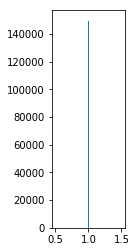

In [209]:
res = model.predict(test_x)

import matplotlib.pyplot as plt

plt.subplot(141)

plt.hist(res, 100)


In [182]:
print(res.max(),res.min(),res.mean(),res.std())



0.14072342 0.13354412 0.1391221 0.002124557


In [176]:
sub.FORTARGET.value_counts()

1    144230
0      5485
Name: FORTARGET, dtype: int64

In [177]:
sub = pd.DataFrame({'EID':merged_test.EID,'FORTARGET':[0 if i < 0.13 else 1 for i in res],'PROB':res.flatten()})
sub.to_csv("result/result.csv", index=0, float_format='%.4f')